# GSEA test
Goal: use Gene 'Set Enrichment Analysis' to identify how stem cells are differetiating and any difference is between intra and extra cellular RNA

ref:
- [Gene set enrichment analysis: A knowledge-based approach for interpreting genome-wide expression profiles](http://www.pnas.org/cgi/doi/10.1073/pnas.0506580102)
- [gsea-msigdb.org user guide ](https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideFrame.html)
- [GSEAPY prerank api](https://gseapy.readthedocs.io/en/v0.9.4/run.html#gseapy.prerank)
- [GSEAPY module APIs](https://gseapy.readthedocs.io/en/v0.9.4/run.html#module-apis)
- [gene ontology](http://geneontology.org/)
- [Molecular Signatures Database (MSigDB)](https://www.gsea-msigdb.org/gsea/msigdb/index.jsp)
- [Interpreting GSEA Results](https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideTEXT.htm#_Interpreting_GSEA_Results)

## <span style="color:red">TODO</span>
1. plot best
2. review 'interperting results'
3. understand bio. Notes from 1:1 on 7/14/2020
    * look for embryonic and developmental pathways data sets
    * some releationship between immune system and IPSC
    * some releationship between KRAS and inflamation
    * not sure why some pathways got plotted. some of them are immune system releated


## Gene set selection
[Gene Set Analysis: A Step-By-Step Guide (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4638147/)

"biological pathways, protein-protein interaction (PPI) networks, and functionally related gene sets (e.g., gene ontology categories) each suggest different types of relationships between the members of a gene set."

"Pathway models suggest a common function or end goal for the pathway’s members, and also provide specific information about how the gene members interact to accomplish that end goal"

"functionally-related gene sets, such as gene ontology (GO) categories, suggest that member genes share a common function or are involved in a common process, but they do not provide any information about how, or if, the members biologically interact (e.g., different gene products may perform the same function, but in different tissues)."

## gene_sets='GO_Biological_Process_2018'

did a search on [HGNC search](https://www.genenames.org/) for 'UVRAG'. Looks like GO_Biological_Process_2018 uses HUGO names

```
(extraCellularRNA) $ head -n 1 ~/.gseapy/enrichr.GO_Biological_Process_2018.gmt 
positive regulation of posttranscriptional gene silencing (GO:0060148)		FXR1	ZFP36	DHX9	XPO5	FMR1	STAT3	WTIP	PUMAJUBA	PUM1	LIMD1
```

## mapping ensembl gene names to  HUGO Gene Nomenclature Committee (HGNC) 
- [ensembl IDs and I would like HGNC](https://m.ensembl.org/Help/Faq?id=125)

### mapping salmon output to HUGO gene names
Biomart is a big data base. You can use it get information about genes and transcripts. It also has information you can use to map to other data bases

two "name" col values from a salmon output file
```
ENST00000456328.2|ENSG00000223972.5|OTTHUMG00000000961.2|OTTHUMT00000362751.1|DDX11L1-202|DDX11L1|1657|lncRNA|

ENST00000450305.2|ENSG00000223972.5|OTTHUMG00000000961.2|OTTHUMT00000002844.2|DDX11L1-201|DDX11L1|632|transcribed_unprocessed_pseudogene|
```

understanding names:
- There are multiple name delimintated by '|'.
- col 0: ENST00000450305.5
    * Ensembl transcript stable id with version information. 
    * the version information is '.5'
- col 1: ENSG00000223972.5
    * Ensembl gene stable id with version information
    * the version information is '.5'
- col 2: OTTHUMG00000000961.2
    * ???? gene name ??? with version information
- col 3: OTTHUMT00000362751.1
    * ???? transcript name with version information ???
- col 4: DDX11L1-202
    * ????? DDX11L1 is HGNC Symbol
- col 5: DDX11L1
    * HGNC Symbol
- col 6: 1657
    * ????
- col 7: lncRNA
    * long non coding RNA ???
    * this column contains a some sort of label
    * see bellow for a complete list of unique values
    * some example: 'scaRNA', 'rRNA_pseudogene', 'unitary_pseudogene',
    
    
biomart example 1:

filter: 'gene stable ID(s) [e.g. ENSG00000000000003]'
filter values: 
```
ENSG00000223972
ENSG00000223972
```

Notice our salmon names are of the form 'ENSG00000223972.5' the '.5' is the version information. We need to filter using 'gene stable ID(s) with version [e.g. ENSG00000000000003.15]'

- [biomart sample query](http://uswest.ensembl.org/biomart/martview/99dcfd524d6284761dfc60af2f379d3b?VIRTUALSCHEMANAME=default&ATTRIBUTES=hsapiens_gene_ensembl.default.feature_page.ensembl_gene_id|hsapiens_gene_ensembl.default.feature_page.ensembl_gene_id_version|hsapiens_gene_ensembl.default.feature_page.source|hsapiens_gene_ensembl.default.feature_page.transcript_source|hsapiens_gene_ensembl.default.feature_page.external_gene_name|hsapiens_gene_ensembl.default.feature_page.external_gene_source|hsapiens_gene_ensembl.default.feature_page.hgnc_id|hsapiens_gene_ensembl.default.feature_page.hgnc_symbol&FILTERS=hsapiens_gene_ensembl.default.filters.ensembl_gene_id."ENSG00000223972,ENSG00000223972"&VISIBLEPANEL=resultspanel)

In [1]:
import gseapy as gp
import logging
import pandas as pd
import pathlib as pl

# set up logging so we can figure out what gseapy bug is
from   setupLogging import setupLogging
configFilePath = setupLogging( default_path='../src/test/logging.test.ini.json')
logger = logging.getLogger(__name__)
logger.debug("using logging configuration file:{}".format(configFilePath)) 

## convert salmon output into gsea prerank() format

In [2]:
aedwip = '../data/kras.ipsc'
# gi = "/public/groups/kimlab/kras.ipsc/bulk.data/day.7/ctrl.1/gencode.salmon.out/"
# dataRoot = pl.Path(gi)
dataRoot = pl.Path(aedwip)
aedwipData = 'kras.ipsc_bulk.data_day.7_ctrl.1_gencode.salmon.out_quant.sf'
# giData = 'quant.sf'
# salmonFilePath = dataRoot.joinpath(giData)
salmonFilePath = dataRoot.joinpath(aedwipData)

In [3]:
salmonDF = pd.read_csv(salmonFilePath, delimiter='\t')

In [4]:
salmonDF.head()

,Name,Length,EffectiveLength,TPM,NumReads
0,ENST00000456328.2|ENSG00000223972.5|OTTHUMG000...,1657,674.715,0.422396,11.070
1,ENST00000450305.2|ENSG00000223972.5|OTTHUMG000...,632,451.000,0.000000,0.000
2,ENST00000488147.1|ENSG00000227232.5|OTTHUMG000...,1351,988.761,28.248736,1084.876
3,ENST00000619216.1|ENSG00000278267.1|-|-|MIR685...,68,8.000,0.000000,0.000
4,ENST00000473358.1|ENSG00000243485.5|OTTHUMG000...,712,519.163,0.212906,4.293


## replace name with HUGO gene name

In [5]:
pd.set_option('max_colwidth', None) # no output limit
salmonDF.loc[:, ['Name']].head()

,Name
0,ENST00000456328.2|ENSG00000223972.5|OTTHUMG00000000961.2|OTTHUMT00000362751.1|DDX11L1-202|DDX11L1|1657|lncRNA|
1,ENST00000450305.2|ENSG00000223972.5|OTTHUMG00000000961.2|OTTHUMT00000002844.2|DDX11L1-201|DDX11L1|632|transcribed_unprocessed_pseudogene|
2,ENST00000488147.1|ENSG00000227232.5|OTTHUMG00000000958.1|OTTHUMT00000002839.1|WASH7P-201|WASH7P|1351|unprocessed_pseudogene|
3,ENST00000619216.1|ENSG00000278267.1|-|-|MIR6859-1-201|MIR6859-1|68|miRNA|
4,ENST00000473358.1|ENSG00000243485.5|OTTHUMG00000000959.2|OTTHUMT00000002840.1|MIR1302-2HG-202|MIR1302-2HG|712|lncRNA|


In [6]:
pd.reset_option('max_colwidth') 

In [7]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
# n = 1 return first split
# n = -1 return all splits
# expand = True : return DataFrame/MultiIndex expanding dimensionality
pd.set_option('max_colwidth', None) # no limit
newNamesDF = salmonDF["Name"].str.split("|", n = -1, expand = True) 
newNamesDF.head()

,0,1,2,3,4,5,6,7,8
0,ENST00000456328.2,ENSG00000223972.5,OTTHUMG00000000961.2,OTTHUMT00000362751.1,DDX11L1-202,DDX11L1,1657,lncRNA,
1,ENST00000450305.2,ENSG00000223972.5,OTTHUMG00000000961.2,OTTHUMT00000002844.2,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,
2,ENST00000488147.1,ENSG00000227232.5,OTTHUMG00000000958.1,OTTHUMT00000002839.1,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,
3,ENST00000619216.1,ENSG00000278267.1,-,-,MIR6859-1-201,MIR6859-1,68,miRNA,
4,ENST00000473358.1,ENSG00000243485.5,OTTHUMG00000000959.2,OTTHUMT00000002840.1,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,


In [8]:
pd.reset_option('max_colwidth') 

## explore name col 7 labels
What are these?

In [9]:
# find unique values of col 7
pd.unique(newNamesDF.iloc[:, 7])

array(['lncRNA', 'transcribed_unprocessed_pseudogene',
       'unprocessed_pseudogene', 'miRNA', 'protein_coding',
       'processed_pseudogene', 'snRNA',
       'transcribed_processed_pseudogene', 'retained_intron',
       'nonsense_mediated_decay', 'misc_RNA', 'TEC', 'pseudogene',
       'transcribed_unitary_pseudogene', 'non_stop_decay', 'snoRNA',
       'scaRNA', 'rRNA_pseudogene', 'unitary_pseudogene',
       'polymorphic_pseudogene', 'rRNA', 'IG_V_pseudogene', 'scRNA',
       'IG_V_gene', 'IG_C_gene', 'IG_J_gene', 'sRNA', 'ribozyme',
       'translated_processed_pseudogene', 'vaultRNA', 'TR_C_gene',
       'TR_J_gene', 'TR_V_gene', 'TR_V_pseudogene',
       'translated_unprocessed_pseudogene', 'TR_D_gene',
       'IG_C_pseudogene', 'TR_J_pseudogene', 'IG_J_pseudogene',
       'IG_D_gene', 'IG_pseudogene', 'Mt_tRNA', 'Mt_rRNA', None],
      dtype=object)

In [10]:
newNamesDF.iloc[:, 7].value_counts()

protein_coding                        83728
lncRNA                                74961
retained_intron                       28383
nonsense_mediated_decay               15788
processed_pseudogene                  10143
unprocessed_pseudogene                 2596
misc_RNA                               2175
snRNA                                  1836
miRNA                                  1828
TEC                                    1145
snoRNA                                  933
transcribed_unprocessed_pseudogene      926
transcribed_processed_pseudogene        493
rRNA_pseudogene                         488
IG_V_pseudogene                         185
IG_V_gene                               143
transcribed_unitary_pseudogene          138
TR_V_gene                               106
unitary_pseudogene                       98
non_stop_decay                           91
TR_J_gene                                78
polymorphic_pseudogene                   63
scaRNA                          

In [11]:
# HUGO  Gene Nomenclature Committee (HGNC) names
hugoNameIdx = 5
salmonDF.loc[:, ['Name']] = newNamesDF.iloc[:, hugoNameIdx]

In [12]:
salmonDF.head()

,Name,Length,EffectiveLength,TPM,NumReads
0,DDX11L1,1657,674.715,0.422396,11.070
1,DDX11L1,632,451.000,0.000000,0.000
2,WASH7P,1351,988.761,28.248736,1084.876
3,MIR6859-1,68,8.000,0.000000,0.000
4,MIR1302-2HG,712,519.163,0.212906,4.293


## Select the prerank Data frame
and rename the columns

In [13]:
rankDF = salmonDF.loc[:, ['Name', 'TPM']]
rankDF = rankDF.rename( columns={'Name':'gene', 'TPM':'score'})
rankDF.head()

,gene,score
0,DDX11L1,0.422396
1,DDX11L1,0.000000
2,WASH7P,28.248736
3,MIR6859-1,0.000000
4,MIR1302-2HG,0.212906


## clean : remove missing values

In [14]:
rankDF.isnull().sum()

gene     5158738
score          0
dtype: int64

In [15]:
print("shape:{}".format(rankDF.shape))
numMissing = (rankDF['score'] == 0).sum()
print("num missing scores:{}".format(numMissing))
print("num scores > 0 = {:,}".format(rankDF.shape[0] - numMissing))

shape:(5385346, 2)
num missing scores:5172012
num scores > 0 = 213,334


In [16]:
print((rankDF['gene'] == '--').sum())
print((rankDF['gene'] == '').sum())

0
0


In [17]:
selectRows = rankDF['score'] != 0
rankDF = rankDF.loc[selectRows,:]
print(rankDF.shape)

(213334, 2)


## GSEA

what is difference between prerank() and single sample ssgsea() and gsea()?

### Notes about example in gseap.py doc
- "*.gct" is gene expression data . [gct format reference](https://software.broadinstitute.org/software/igv/GCT#:~:text=A%20GCT%20file%20(.,gene%20expression%20and%20RNAi%20data.)

[Gene Set Enrichment Analysis (GSEA) User Guide pre rank](https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideTEXT.htm#_GSEAPreranked_Page)

use prerank() for rna expression data

- The GSEAPreranked tool can be very helpful for performing gene set enrichment analysis on data that do not conform to the typical GSEA scenario. For example, it can be used when the ranking metric choices provided by GSEA are not appropriate for the data, or when a ranked list of genomic features deviates from traditional gene expression data (e.g., GWAS results, ChIP seq, etc.). 

- It is strongly recommended to make sure that the data do not include duplicate ranking values because GSEA does not resolve ties. In the case of a tie, the order of genes will be arbitrary, which may or may not produce erroneous results.

- In the case of GSEAPreranked, you should make sure that this weighted scoring scheme applies to your choice of ranking statistic – i.e. the magnitude of the ranking metric is biologically meaningful.

(https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideTEXT.htm#_Running_a_Gene_Set%20Enrichment%20Analy)


- [gseapy.gsea() example](https://gseapy.readthedocs.io/en/latest/gseapy_example.html#4.-GSEA-Example)
use this if we had our own labels

- [gseapy Single Sample GSEA example](https://gseapy.readthedocs.io/en/latest/gseapy_example.html#5.-Single-Sample-GSEA-example)


In [18]:
# aedwipOutDir = './gsea.out'
aedwipOutDir="/Users/andrewdavidson/googleUCSC/kimLab/extraCellularRNA/data/kras.ipsc/gsea.out"
gseaOutDir = dataRoot.joinpath(aedwipOutDir)
# giOutDir = pl.Path('/public/home/aedavids/extraCellularRNA/data/gsea.out')
# gseaOutDir = giOutDir
print(gseaOutDir)
gseaOutDir.mkdir(exist_ok=True)

/Users/andrewdavidson/googleUCSC/kimLab/extraCellularRNA/data/kras.ipsc/gsea.out


In [19]:
print(rankDF.shape)

(213334, 2)


In [20]:
%%time
# https://gseapy.readthedocs.io/en/v0.9.4/run.html#gseapy.prerank
preRes = gp.prerank( rankDF, #.loc[:, ['gene', 'score']], 
                 gene_sets='GO_Biological_Process_2018',
                 processes=10,
                 permutation_num=1000,  # reduce number to speed up test, default 1000
                 outdir=str(gseaOutDir),
                    min_size=15, #(Minimum allowed number of genes from gene set also the data set. Defaut: 15.
                    format='png', 
                    seed=42,
                    verbose=True )

2020-07-16 14:47:58,393 Input gene rankings contains NA values(gene name and ranking value), drop them all!


[WARNING gsea.py:93 - _load_ranking()] Input gene rankings contains NA values(gene name and ranking value), drop them all!


2020-07-16 14:47:59,422 Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!


[WARNING gsea.py:100 - _load_ranking()] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!


2020-07-16 14:48:00,428 Parsing data files for GSEA.............................


[INFO gsea.py:498 - run()] Parsing data files for GSEA.............................


2020-07-16 14:48:00,692 Enrichr library gene sets already downloaded in: /Users/andrewdavidson/.gseapy, use local file


[INFO gsea.py:167 - parse_gmt()] Enrichr library gene sets already downloaded in: /Users/andrewdavidson/.gseapy, use local file


2020-07-16 14:49:43,534 2597 gene_sets have been filtered out when max_size=500 and min_size=15


[INFO gsea.py:136 - load_gmt()] 2597 gene_sets have been filtered out when max_size=500 and min_size=15


2020-07-16 14:49:43,535 2506 gene_sets used for further statistical testing.....


[INFO gsea.py:502 - run()] 2506 gene_sets used for further statistical testing.....


2020-07-16 14:49:43,537 Start to run GSEA...Might take a while..................


[INFO gsea.py:503 - run()] Start to run GSEA...Might take a while..................


2020-07-16 14:59:46,996 Start to generate gseapy reports, and produce figures...


[INFO gsea.py:511 - run()] Start to generate gseapy reports, and produce figures...


2020-07-16 15:00:02,099 Congratulations. GSEApy runs successfully................



[INFO gsea.py:523 - run()] Congratulations. GSEApy runs successfully................

CPU times: user 2min 42s, sys: 2.66 s, total: 2min 45s
Wall time: 12min 3s


In [21]:
print(type(preRes.results))

<class 'collections.OrderedDict'>


# Top pathways
- [Interpreting GSEA Results](https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideTEXT.htm#_Interpreting_GSEA_Results)

The false discovery rate (FDR) is the estimated probability that a gene set with a given NES represents a false positive finding. For example, an FDR of 25% indicates that the result is likely to be valid 3 out of 4 times. The GSEA analysis report highlights enrichment gene sets with an FDR of less than 25% as those most likely to generate interesting hypotheses and drive further research

The nominal p value estimates the statistical significance of the enrichment score for a single gene set. <span style="color:red">However, when you are evaluating multiple gene sets, you must correct for gene set size and multiple hypothesis testing. Because the p value is not adjusted for either, it is of limited value when comparing gene sets.</span> The Gene Set Enrichment Analysis PNAS paper describes the p value statistic in the section titled Appendix: Mathematical Description of Methods.

In [22]:
csvFile = gseaOutDir.joinpath("gseapy.prerank.gene_sets.report.csv")
gseaResultDF = pd.read_csv(str(csvFile))
print(gseaResultDF.columns)

Index(['Term', 'es', 'nes', 'pval', 'fdr', 'geneset_size', 'matched_size',
       'genes', 'ledge_genes'],
      dtype='object')


In [37]:
print("!!! very high FDR !!!\n")
signfigantRows = ((gseaResultDF["fdr"] < 0.75) & (gseaResultDF["pval"] < 0.05))
print("{}".format(signfigantRows[0:5].values))
print("len(signfigantRows){}".format(len(signfigantRows)))
print("sum(signfigantRows){}".format(sum(signfigantRows)))
candidatePathwaysDF = gseaResultDF.loc[signfigantRows, :]
print("candidatePathwaysDF.shape:{}".format(candidatePathwaysDF.shape))

!!! very high FDR !!!

[False False False False False]
len(signfigantRows)2506
sum(signfigantRows)5
candidatePathwaysDF.shape:(5, 9)


In [24]:
# select top 5
# nes == normalize enrichment score
sortedDF = candidatePathwaysDF.sort_values(by='nes', ascending=False)
topDF = sortedDF.iloc[0:5, :]
topDF

,Term,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
692,regulation of translation (GO:0006417),0.865263,1.162915,0.037,0.735687,214,206,GAPDH;RPL26;RPL13A;RPL10;RPL5;RACK1;H3F3A;RPS3...,GAPDH;RPL26;RPL13A;RPL10;RPL5;RACK1;H3F3A;RPS3...
538,neutrophil degranulation (GO:0043312),0.854962,1.141604,0.021,0.731749,480,419,EEF1A1;FTL;TUBB;PPIA;PKM;MIF;HSP90AB1;FTH1;NME...,EEF1A1;FTL;TUBB;PPIA;PKM;MIF;HSP90AB1;FTH1;NME...
629,neutrophil activation involved in immune respo...,0.854891,1.138890,0.023,0.734031,484,422,EEF1A1;FTL;TUBB;PPIA;PKM;MIF;HSP90AB1;FTH1;NME...,EEF1A1;FTL;TUBB;PPIA;PKM;MIF;HSP90AB1;FTH1;NME...
489,neutrophil mediated immunity (GO:0002446),0.854324,1.134550,0.033,0.728589,488,427,EEF1A1;FTL;TUBB;PPIA;PKM;MIF;HSP90AB1;FTH1;NME...,EEF1A1;FTL;TUBB;PPIA;PKM;MIF;HSP90AB1;FTH1;NME...
333,negative regulation of apoptotic process (GO:0...,0.842825,1.121519,0.046,0.718557,486,450,MT-RNR2;RPS3A;RPL10;TPT1;RPS27A;UBA52;NPM1;MIF...,MT-RNR2;RPS3A;RPL10;TPT1;RPS27A;UBA52;NPM1;MIF...


In [25]:
# https://stackoverflow.com/a/35693013/4586180
# display data frame with out index column
# from IPython.display import display, HTML
# display(HTML(sortedDF.iloc[0:20, :].to_html(index=False)))

Term,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
regulation of translation (GO:0006417),0.865263,1.162915,0.037,0.735687,214,206,GAPDH;RPL26;RPL13A;RPL10;RPL5;RACK1;H3F3A;RPS3;NPM1;RPS4X;EEF2;VIM;RAN;CALR;NCL;HNRNPD;EIF4G2;EIF1;TYMS;EIF3H;EIF3E;EIF3C;CIRBP;EIF4H;RBM3;EIF4B;POLR2G;POLR2K;EIF3D;POLR2L;LIN28A;EIF1B;CDC123;EIF4A3;APP;POLR2J;EIF6;DHX9;RBM4;DDX1;POLR2E;POLR2I;EIF3B;RPS27L;HSPB1;DHFR;IGF2BP1;POLR2F;ETF1;ILF3;POLR2C;EIF4A2;SYNCRIP;ELAVL1;AAAS;IGFBP5;SAMD4B;DDX3X;FXR1;CNOT1;EIF4E2;SOX4;MALSU1;NUP62;POLR2A;NCBP2;ENC1;EIF4E;EIF5B;EIF4G1;LARP1;NUP93;POLR2H;EIF5;POLDIP3;MTPN;PAIP1;NUP85;METAP1;POLR2B;CAPRIN1;YTHDF1;PYM1;MRPL58;NUP50;NUP54;IGF2BP2;EPRS;PUM3;NUP37;MEX3D;NUP188;RAE1;TPR;MEX3A;NUP205;CNOT3;NUP88;NUP160;DDX6;DAPK3;FXR2;NUP153;RIDA;NUP107;TOB1;EIF2A;NOLC1;MTG1;SEH1L;UPF3B;NDC1;NUP133;NUP98;ERBB2;CNOT9;BTG2;MEX3C;POM121C;NCBP1;CYFIP1;NUP43;CNOT7;POLR2D;UPF1;IGF2BP3;NUP35;CNOT8;ZNF385A;TSFM;MAPKAPK5;NUP58;EIF2B4;TRIM71;YTHDF3;TCOF1;PUM2;MTG2;ZNF598;RBM4B;OGFOD1;POM121;RANBP2;CNOT2;MEX3B;DAPK1;UPF3A;SHMT1;GEMIN5;MTIF2;CNOT10;RPS6KB1;EIF4G3;LARP4B;EIF2B2;LARP6;GLE1;MTOR;NUP155;NEMF;PUM1;LARP4;RPS6KA1;RNF139;IPO8;PASK;ALKBH1;TNRC6A;FMR1;GIGYF2;AGO1;FOXO3;NUP214;MIF4GD;NUP210;KLHL25;ATXN2;TSC1;EIF2AK4;LTN1;RPS6KA3;CTIF;MTRF1;DDX25;AGO2;THBS1;CYFIP2;EIF2AK3;EIF2AK2;YBX2;NANOS1;NSUN3;BCL3;SAMD4A;GRB7;PATL2;ZNF540;HIST1H3A;CPEB3;PRR16;NANOS3;HSP90B2P;PIWIL2;IL6;NANOS2;GRM5,GAPDH;RPL26;RPL13A;RPL10;RPL5;RACK1;H3F3A;RPS3;NPM1;RPS4X;EEF2;VIM;RAN;CALR;NCL;HNRNPD;EIF4G2;EIF1;TYMS;EIF3H;EIF3E;EIF3C;CIRBP;EIF4H;RBM3;EIF4B;POLR2G;POLR2K;EIF3D;POLR2L;LIN28A;EIF1B;CDC123;EIF4A3;APP;POLR2J;EIF6;DHX9;RBM4;DDX1;POLR2E;POLR2I;EIF3B;RPS27L;HSPB1;DHFR;IGF2BP1;POLR2F;ETF1;ILF3;POLR2C;EIF4A2;SYNCRIP;ELAVL1;AAAS;IGFBP5;SAMD4B;DDX3X;FXR1;CNOT1;EIF4E2;SOX4;MALSU1;NUP62;POLR2A;NCBP2;ENC1;EIF4E;EIF5B;EIF4G1;LARP1;NUP93;POLR2H;EIF5;POLDIP3;MTPN;PAIP1;NUP85;METAP1;POLR2B;CAPRIN1;YTHDF1
neutrophil degranulation (GO:0043312),0.854962,1.141604,0.021,0.731749,480,419,EEF1A1;FTL;TUBB;PPIA;PKM;MIF;HSP90AB1;FTH1;NME2;EEF2;HSPA8;GSTP1;HMGB1;HSP90AA1;SRP14;DYNLL1;ALDOA;ILF2;TUBB4B;PGAM1;S100A11;RHOA;FABP5;XRCC5;PSMB1;PSAP;CD63;IMPDH2;CCT2;XRCC6;CCT8;PSMB7;PRDX6;GDI2;NDUFC2;CSNK2B;RAC1;PA2G4;PSMA2;GRN;VCP;DDOST;ANXA2;COTL1;PSMC3;ATP6V0C;PRDX4;PSMD7;CYBA;CTSD;LAMTOR1;RAB7A;CST3;PSMD2;TRAPPC1;PSMD13;CKAP4;PSMD3;PGRMC1;MGST1;PSMD14;CYB5R3;KPNB1;NPC2;CNN2;DYNLT1;VAPA;APRT;PSMD6;SURF4;ACTR2;TXNDC5;RAB5C;PDAP1;GGH;BRI3;LAMP1;PSMC2;VAT1;LTA4H;LAMTOR2;B2M;CTSC;SLC2A3;IDH1;PFKL;GSN;DDX3X;NCSTN;MLEC;CAP1;ATP6V1D;IST1;PSMA5;PSMD1;RAP1B;PRCP;HSPA1A;VAMP8;ATP6AP2;CAND1;DEGS1;CTSZ;SDCBP;DYNC1LI1;COPB1;RAB5B;CTSB;RAB10;SLC44A2;ARPC5;PAFAH1B2;PGM1;DERA;CMTM6;PSMD11;PTGES2;PNP;LPCAT1;TMEM30A;RAB14;NRAS;COMMD9;GPI;ORMDL3;ACLY;HEXB;APEH;BST2;SNAP23;VCL;RHOG;CREG1;CYSTM1;CPNE1;HUWE1;PPIE;PYGL;SPTAN1;UBR4;YPEL5;TMEM179B;AP1M1;GOLGA7;PSMD12;CSTB;GLA;MAN2B1;PYGB;GAA;NIT2;CTSA;FUCA2;TSPAN14;GLB1;GUSB;ACTR1B;CYFIP1;ACTR10;FAF2;TIMP2;NEU1;RAB31;LAMTOR3;GNS;HSPA1B;DIAPH1;CD47;CAB39;QSOX1;RAB6A;ARL8A;ADAM10;B4GALT1;DBNL;RAB18;CD59;PLAU;AP2A2;DNAJC5;MAGT1;JUP;KCMF1;SIRPA;DYNC1H1;AGPAT2;STXBP3;DLC1;RAP1A;PSEN1;CAPN1;TOLLIP;ATAD3B;PLEKHO2;SYNGR1;HMOX2;IGF2R;IMPDH1;COMMD3;TOM1;ITGAV;ACAA1;A1BG;RAB4B;MAPK14;GALNS;ERP44;CANT1;HEBP2;ALDOC;GM2A;PRKCD;VAMP7;MAPK1;DSN1;IQGAP1;ASAH1;RAP2C;ROCK1;LAMP2;PDXK;PGM2;SNAP29;TMC6;STK11IP;DGAT1;GYG1;HGSNAT;ARSB;RAB24;ANO6;RAP2B;DNAJC13;ATP6V0A1;CPNE3;AGA;GCA;STOM;ALAD;DNAJC3;STXBP2;DSP;SCAMP1;SVIP;TMBIM1;DPP7;ARMC8;OSTF1;CDK13;ANXA3;SERPINB1;ATP11A;ATG7;RNASET2;NFKB1;PLAUR;STK10;MOSPD2;NAPRT;ATP11B;NHLRC3;CEP290;SERPINB6;CDA;GMFG;CD58;CPPED1;PTPRJ;GHDC;MANBA;FUCA1;ARSA;CTSH;PRSS2;CAT;RHOF;LGALS3;MMP9;PADI2;AGL;APAF1;ADA2;DNASE1L1;TMEM63A;KCNAB2;DOK3;MMP25;HVCN1;PTX3;RAB3A;RAB27A;ARHGAP45;TCIRG1;CD55;IQGAP2;RAB3D;PYCARD;CHRNB4;FCER1G;NBEAL2;PTPN6;CD44;RAB9B;ADAM8;SNAP25;STBD1;ENPP4;NFASC;MVP;BST1;METTL7A;PTPRN2;ATP8A1;TBC1D10C;CD177;GSDMD;CD33;MME;RAB37;LYZ;ANPEP;QPCT;ADGRE5;CRISPLD2;SLCO4C1;AZU1;SLPI;C3;CFP;FCGR2A;UNC13D;CRISP3;ACPP;GLI

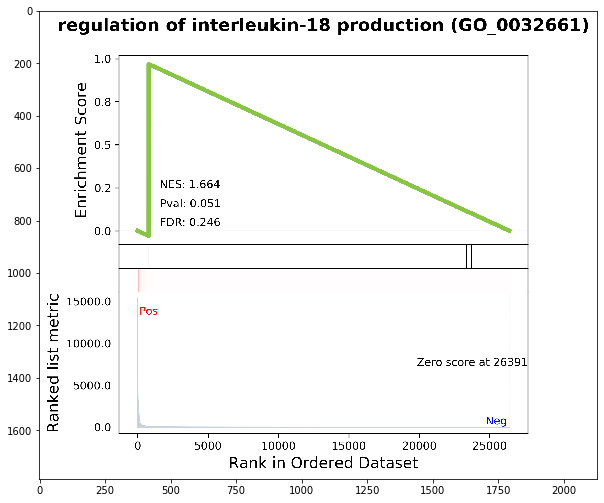

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
# plot a random image. I do not know this plot was generated
imgPath = gseaOutDir.joinpath("regulation of interleukin-18 production (GO_0032661).prerank.png")
img = mpimg.imread(str(imgPath) )
plt.imshow(img)